In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit
import glob
import h5py
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt
from astropy import table
import plotly.graph_objects as go
from matplotlib.pyplot import figure

#imports necessary libraries

In [2]:
path = '/Users/jossherk/Desktop/lsa-ast361/Work/jossherk/josiah-sherk-lab-8/galaxyData/'

#defines necessary path to import data

In [3]:
galaxyFiles = [path + "galpos00.dat", path + "galpos10.dat", path + "galpos20.dat", path + "galpos30.dat", path + "galpos40.dat", path + "galpos50.dat", path + "galpos60.dat", path + "galpos70.dat", path + "galpos80.dat", path + "galpos90.dat"]
calibFiles = [path + "calib_pole.dat"]

#reads in flux data at each longitude and calibration data

In [4]:
gal_Data = []
calData = []

#defines two empty lists for galactic flux and calibration flux

In [5]:
for galaxyFile in galaxyFiles: #Pulls files individually from the list of galaxy files
    
    with open(galaxyFile) as gal_data: #Opens each file and adds it to a new list called gal_data
        
        data_rows = []    #Creates an empty list for galaxy data
        
        for j, row in enumerate(gal_data, start=1): #Iterates through a row of the data 
            if j%4 == 0: 
                data_rows.append(row) #Adds each fourth row to the list of data
                
        tot_data = np.zeros(1024) #Defines an array with 1024 zeros
        for row in data_rows: 
            temp_dat = row.split(' ') #Splits rows, treating them as strings
            dat = [] #Creates  empty list to hold galaxy data
            for val in temp_dat: #Iterates over elements from the split list
                if val != '' and val != '\n': #Adds all flux values into the galaxy list
                    dat.append(val) #Adds actual flux values into the galaxy list
                    
            x = tot_data + np.float64(dat)
            tot_norm = x / len(data_rows) #Normalizes the data by dividing each value by the number of rows
        np.array(gal_Data.append(tot_norm)) #Appends tot_norm into the galaxy list
print(gal_Data)
print(len(data_rows))

[array([0.        , 0.        , 0.        , ..., 0.15955357, 0.163875  ,
       0.159625  ]), array([0.        , 0.        , 0.        , ..., 0.15603509, 0.15473684,
       0.15621053]), array([0.        , 0.        , 0.        , ..., 0.15064063, 0.15023438,
       0.14885937]), array([0.        , 0.        , 0.        , ..., 0.15577586, 0.15715517,
       0.15822414]), array([0.        , 0.        , 0.        , ..., 0.15632759, 0.15886207,
       0.15574138]), array([0.        , 0.        , 0.        , ..., 0.15684483, 0.15818966,
       0.15493103]), array([0.        , 0.        , 0.        , ..., 0.15682456, 0.15898246,
       0.16005263]), array([0.        , 0.        , 0.        , ..., 0.16089474, 0.15808772,
       0.15854386]), array([0.        , 0.        , 0.        , ..., 0.15880702, 0.15782456,
       0.15968421]), array([0.        , 0.        , 0.        , ..., 0.24724324, 0.24632432,
       0.23972973])]
37


In [6]:
for calibFile in calibFiles: 
    
    with open(calibFile) as calib_data: 
        
        data_rows = []    
        
        for j, row in enumerate(calib_data, start=1): 
            if j%4 == 0: 
                data_rows.append(row) 
                
        totc_data = np.zeros(1024) 
        for row in data_rows: 
            temp_dat = row.split(' ') 
            dat = [] 
            for val in temp_dat: 
                if val != '' and val != '\n': 
                    dat.append(val) 
            
            x = totc_data + np.float64(dat)
            totc_norm = x / len(data_rows)
            
        calData.append(totc_norm) 
        print(calData)
        print(len(data_rows))
        
        #performs the same actions as in the cell above but for calibration data

[array([0.        , 0.        , 0.        , ..., 0.07374359, 0.07310256,
       0.07505128])]
117


In [7]:
gal_Long = [0,10,20,30,40,50,60,70,80,90] #defines list for longitudes

In [8]:
freq = np.arange(1416,1426,0.009766) #defines array of frequencies with pixel mapping adjustments as found in lab 7

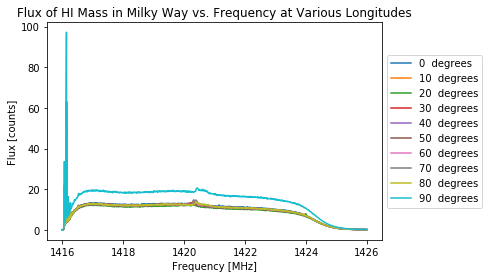

In [9]:
for i in range(len(gal_Data)):
    plt.plot(freq, gal_Data[i],label = str(i*10)+"  degrees")
plt.title("Flux of HI Mass in Milky Way vs. Frequency at Various Longitudes")
plt.xlabel("Frequency [MHz]")
plt.ylabel("Flux [counts]")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#Plots Flux vs. Frequency for each element in the array

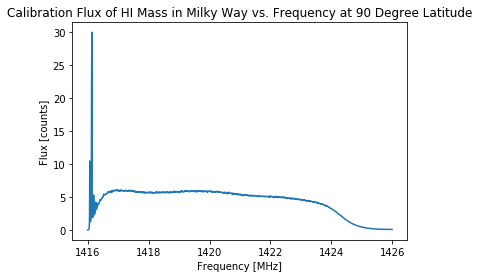

In [10]:
#calibrated spectrum

for i in range(len(calData)):
    plt.plot(freq, calData[i])
plt.title("Calibration Flux of HI Mass in Milky Way vs. Frequency at 90 Degree Latitude")
plt.xlabel("Frequency [MHz]")
plt.ylabel("Flux [counts]")
plt.show()

#Plots the calibration flux vs. frequency

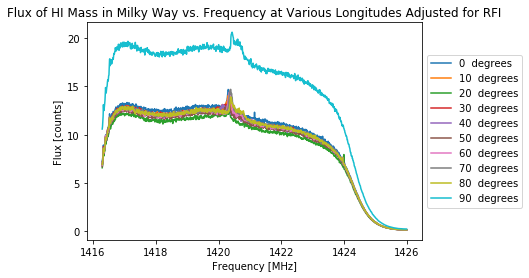

In [11]:
#We cut out the radio frequency interference (rfi)

for i in range(len(gal_Data)):
    plt.plot(freq[30:], gal_Data[i][30:], label = str(i*10)+"  degrees") #cuts out the first 15 elements of the array
plt.title("Flux of HI Mass in Milky Way vs. Frequency at Various Longitudes Adjusted for RFI")
plt.xlabel("Frequency [MHz]")
plt.ylabel("Flux [counts]")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

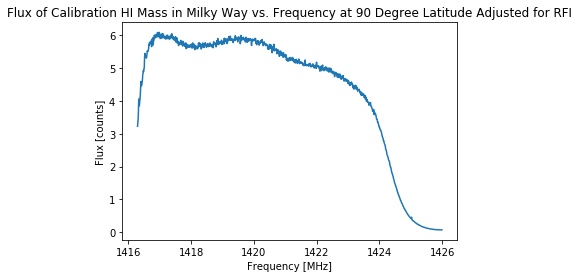

In [12]:
#We cut out the radio frequency interference (rfi)

for i in range(len(calData)):
    plt.plot(freq[30:], calData[i][30:]) #cuts out the first 15 elements of the array
plt.title("Flux of Calibration HI Mass in Milky Way vs. Frequency at 90 Degree Latitude Adjusted for RFI")
plt.xlabel("Frequency [MHz]")
plt.ylabel("Flux [counts]")
plt.show()

#It appears that the beam was pointing too close to the ground and our calibration spectra has a greater flux than our
#galactic spectra

In [13]:
#We subtract the calibration data from each element of the galData array

gal_Data = np.array(gal_Data)

calData = np.array(calData)

GalData = gal_Data - calData
GalData = np.array(GalData)

print(GalData)

[[0.         0.         0.         ... 0.08580998 0.09077244 0.08457372]
 [0.         0.         0.         ... 0.0822915  0.08163428 0.08115924]
 [0.         0.         0.         ... 0.07689704 0.07713181 0.07380809]
 ...
 [0.         0.         0.         ... 0.08715115 0.08498516 0.08349258]
 [0.         0.         0.         ... 0.08506343 0.084722   0.08463293]
 [0.         0.         0.         ... 0.17349965 0.17322176 0.16467845]]


In [14]:
print(len(GalData))
print(len(gal_Data))
print(len(calData))

gal_Data.shape

#Prints arrays defined in the cell above to make sure they are correct

10
10
1


(10, 1024)

In [15]:
GalData.shape

#Checks the shape of the GalData array

(10, 1024)

In [16]:
calData.shape

#Checks the shape of the calibration data array

(1, 1024)

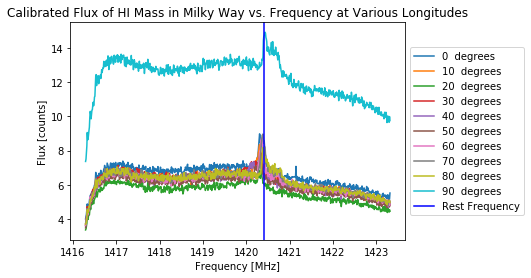

In [17]:
for i in range(len(GalData)):
    plt.plot(freq[30:750], GalData[i][30:750], label = str(i*10) + '  degrees')
plt.title("Calibrated Flux of HI Mass in Milky Way vs. Frequency at Various Longitudes")
plt.xlabel("Frequency [MHz]")
plt.ylabel("Flux [counts]")
plt.axvline(x = 1420.406, c = 'b', label = "Rest Frequency") #Rest frequency for 21cm emission
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#Plots Calibrated flux against frequency

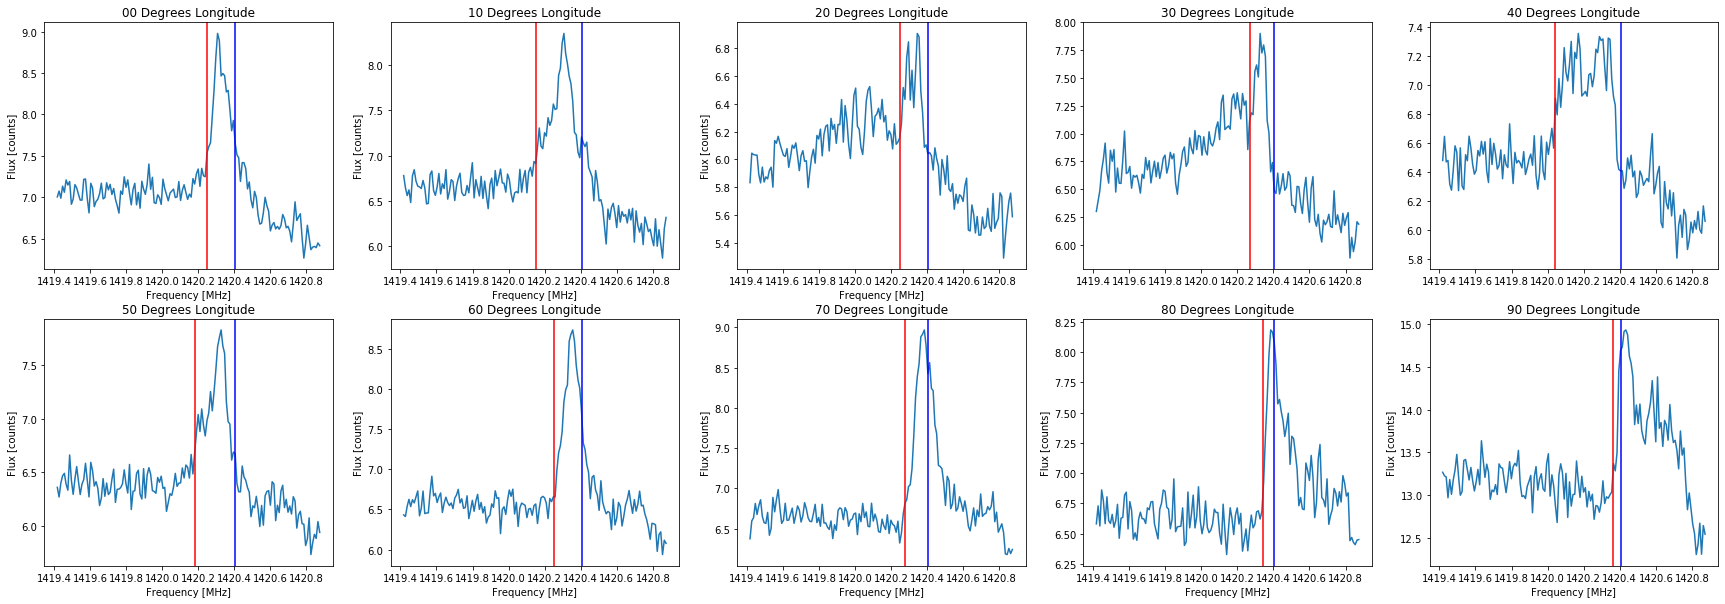

In [18]:
#Separately plots flux vs. frequency in a zoomed in range at each longitude to highlight 21 cm and doppler velocities

plt.rcParams["figure.figsize"] = (30,10)

plt.subplot(2, 5, 1)
plt.title("00 Degrees Longitude")
plt.xlabel("Frequency [MHz]")
plt.ylabel("Flux [counts]")
plt.plot(freq[350:500],GalData[0][350:500])
plt.axvline(x = 1420.406, c = 'b') #Rest frequency for 21cm emission
plt.axvline(x = 1420.25,c ='r')

plt.subplot(2, 5, 2)
plt.title("10 Degrees Longitude")
plt.xlabel("Frequency [MHz]")
plt.ylabel("Flux [counts]")
plt.plot(freq[350:500],GalData[1][350:500])
plt.axvline(x = 1420.406, c = 'b') #Rest frequency for 21cm emission
plt.axvline(x = 1420.15,c ='r')

plt.subplot(2, 5, 3)
plt.title("20 Degrees Longitude")
plt.xlabel("Frequency [MHz]")
plt.ylabel("Flux [counts]")
plt.plot(freq[350:500],GalData[2][350:500])
plt.axvline(x = 1420.406, c = 'b') #Rest frequency for 21cm emission
plt.axvline(x = 1420.25,c ='r')

plt.subplot(2, 5, 4)
plt.title("30 Degrees Longitude")
plt.plot(freq[350:500],GalData[3][350:500])
plt.axvline(x = 1420.406, c = 'b') #Rest frequency for 21cm emission
plt.axvline(x = 1420.27,c ='r')

plt.subplot(2, 5, 5)
plt.title("40 Degrees Longitude")
plt.plot(freq[350:500],GalData[4][350:500])
plt.axvline(x = 1420.406, c = 'b') #Rest frequency for 21cm emission
plt.axvline(x = 1420.04,c ='r')

plt.subplot(2, 5, 6)
plt.title("50 Degrees Longitude")
plt.xlabel("Frequency [MHz]")
plt.ylabel("Flux [counts]")
plt.plot(freq[350:500],GalData[5][350:500])
plt.axvline(x = 1420.406, c = 'b') #Rest frequency for 21cm emission
plt.axvline(x = 1420.18,c ='r')

plt.subplot(2, 5, 7)
plt.title("60 Degrees Longitude")
plt.xlabel("Frequency [MHz]")
plt.ylabel("Flux [counts]")
plt.plot(freq[350:500],GalData[6][350:500])
plt.axvline(x = 1420.406, c = 'b') #Rest frequency for 21cm emission
plt.axvline(x = 1420.25,c ='r')

plt.subplot(2, 5, 8)
plt.title("70 Degrees Longitude")
plt.xlabel("Frequency [MHz]")
plt.ylabel("Flux [counts]")
plt.plot(freq[350:500],GalData[7][350:500])
plt.axvline(x = 1420.406, c = 'b') #Rest frequency for 21cm emission
plt.axvline(x = 1420.28,c ='r')

plt.subplot(2, 5, 9)
plt.title("80 Degrees Longitude")
plt.xlabel("Frequency [MHz]")
plt.ylabel("Flux [counts]")
plt.plot(freq[350:500],GalData[8][350:500])
plt.axvline(x = 1420.406, c = 'b') #Rest frequency for 21cm emission
plt.axvline(x = 1420.34,c ='r')

plt.subplot(2, 5, 10)
plt.title("90 Degrees Longitude")
plt.xlabel("Frequency [MHz]")
plt.ylabel("Flux [counts]")
plt.plot(freq[350:500],GalData[9][350:500])
plt.axvline(x = 1420.406, c = 'b') #Rest frequency for 21cm emission
plt.axvline(x = 1420.36,c ='r')

In [19]:
#Makes a table of frequencies and corresponding doppler velocities as found in teh charts above

fig = go.Figure(data = [go.Table(header=dict(values=['Frequency at Maximum Velocities [MHz]','Corresponding Doppler Velocity [km/s]']), cells=dict(values=[[1420.25,1420.15,1420.25,1420.27,1420.04,1420.18,1420.25,1420.28,1420.34,1420.36],[32.925,54.031,32.925,28.704,77.248,47.700,32.925,26.593,13.930,9.709]]))])

fig.show()

#Doppler velocities as calculated by hand - 32.925,54.031,32.925,28.704,77.248,47.700,32.925,26.593,13.930,9.709

galvel = []
galvel = [32.925,54.031,32.925,28.704,77.248,47.700,32.925,26.593,13.930,9.709]

In [28]:
#Plot velocity vs. radius
vslr = [] 
vslr = [10.48,9.86,8.96,7.77,6.33,4.70,2.93,1.07,-0.82,-2.68] #Values found in each data file that need to be corrected for
tvel = []
tvel = [0,0,0,0,0,0,0,0,0,0]
sigma = []
sigma = [0,0,0,0,0,0,0,0,0,0]
    
for i in range(0,10):
    tvel[i] = galvel[i] - vslr[i] + 255*np.sin((10*i)*(np.pi/180))
#For loop that calculates the tangental velocity of the galaxy at each longitude, correcting for vslr at each 
#element of the array

print(galvel)
print(tvel)

[32.925, 54.031, 32.925, 28.704, 77.248, 47.7, 32.925, 26.593, 13.93, 9.709]
[22.444999999999997, 88.45128530506723, 111.18013654804551, 148.434, 234.82884047006752, 238.3413329953394, 250.83147796503184, 265.14461830040665, 265.8759770181131, 267.389]


In [21]:
fig = go.Figure(data = [go.Table(header=dict(values=['Frequency [MHz]','Tangental Velocity [km/s]']), cells=dict(values=[[1420.25,1420.15,1420.25,1420.27,1420.04,1420.18,1420.25,1420.28,1420.34,1420.36],[22.444999999999997, 88.45128530506723, 111.18013654804551, 148.434, 234.82884047006752, 238.3413329953394, 250.83147796503184, 265.14461830040665, 265.8759770181131, 267.389]]))])

fig.show()

#Updated table of tangental velocities at corresponding doppler shifts

In [32]:
radius = []
radius = [0,0,0,0,0,0,0,0,0,0]
#radius of the milky way is known to be 25 kpc

for i in range(0,10):
    radius[i] = 8*np.sin((10*i)*np.pi/180)
    
#this accounts for the error

for i in range(0,10):
    sigma[i] = 5.1*np.sin(10*i*(np.pi/180))
    
print(radius)
print(tvel)
print(sigma)

[0.0, 1.3891854213354426, 2.7361611466053497, 3.9999999999999996, 5.142300877492314, 6.128355544951824, 6.928203230275509, 7.5175409662872665, 7.878462024097664, 8.0]
[22.444999999999997, 88.45128530506723, 111.18013654804551, 148.434, 234.82884047006752, 238.3413329953394, 250.83147796503184, 265.14461830040665, 265.8759770181131, 267.389]
[0.0, 0.8856057061013446, 1.7443027309609103, 2.5499999999999994, 3.27821680940135, 3.9068266599067876, 4.416729559300636, 4.792432366008132, 5.022519540362261, 5.1]


In [44]:
fig = go.Figure(data = [go.Table(header=dict(values=['Galactic Longitude','Most Negative Frequency (MHz)', 
                                                     'Max 21 cm Velocity (km/s)', 'Estimated Error (km/s)', 
                                                     'Tangential Distance from the Galactic Center (kpc)']), 
                                 cells=dict(values=[[0,10,20,30,40,50,60,70,80,90],
                                                    [1420.25,1420.15,1420.25,1420.27,1420.04,1420.18,1420.25,1420.28,1420.34,1420.36],
                                                    [22.444999999999997, 88.45128530506723, 111.18013654804551, 148.434, 234.82884047006752, 238.3413329953394, 250.83147796503184, 265.14461830040665, 265.8759770181131, 267.389],
                                                    [0.0, 0.8856057061013446, 1.7443027309609103, 2.5499999999999994, 3.27821680940135, 3.9068266599067876, 4.416729559300636, 4.792432366008132, 5.022519540362261, 5.1],
                                                    [0.0, 1.3891854213354426, 2.7361611466053497, 3.9999999999999996, 5.142300877492314, 6.128355544951824, 6.928203230275509, 7.5175409662872665, 7.878462024097664, 8.0]]))])

fig.show()

Text(0, 0.5, 'Velocity [km/s]')

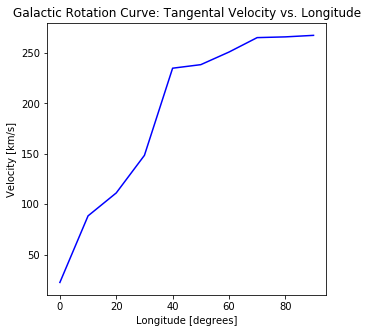

In [31]:
#Plots tangental velocities against longitude
plt.figure(figsize = (5,5))
plt.plot(gal_Long, tvel, 'b')
plt.title("Galactic Rotation Curve: Tangental Velocity vs. Longitude")
plt.xlabel("Longitude [degrees]")
plt.ylabel("Velocity [km/s]")

Text(0, 0.5, 'Velocity [km/s]')

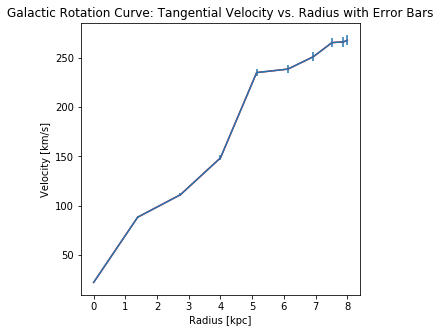

In [34]:
plt.figure(figsize = (5,5))
plt.plot(radius, tvel, 'r')
plt.errorbar(radius, tvel, sigma)
plt.title("Galactic Rotation Curve: Tangential Velocity vs. Radius with Error Bars")
plt.xlabel("Radius [kpc]")
plt.ylabel("Velocity [km/s]")

#Plots tangental velocities against radius